In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import numpy as np
from datetime import datetime
import seaborn as sns

In [2]:
data = """
Project ID,Site Location,Project Status,Material Cost,Labor Hours,Project Progress,Report Date
P001,Site A,In Progress,150000,2500,75%,2024-01-15
P002,Site B,Completed,120000,1800,100%,2023-12-01
P003,Site C,Delayed,200000,3000,50%,2024-01-20
P004,Site A,In Progress,160000,2600,80%,2024-01-20
P005,Site D,Completed,110000,1700,100%,2023-11-15
P001,Site A,In Progress,155000,2550,78%,2024-01-22
P006,Site B,In Progress,130000,2000,60%,2024-02-01
P007,Site E,Delayed,220000,3200,45%,2024-02-05
P008,Site C,Completed,190000,2800,100%,2024-01-25
P009,Site A,In Progress,170000,2700,85%,2024-02-10
P010,Site D,In Progress,100000,1500,90%,2024-02-15
P002,Site B,Completed,120000,1800,100%,2023-12-01
P011,Site F,In Progress,180000,2900,70%,2024-03-01
P012,Site E,Completed,210000,3100,100%,2024-02-28
P003,Site C,DELAYED,205000,3050,55%,2024-02-20
P013,Site A,In Progress,140000,2400,72%,2024-03-05
P014,Site G,Completed,90000,1400,100%,2024-01-10
P015,Site H,In Progress,230000,3500,40%,2024-03-10
P001,Site A,In Progress,160000,2600,82%,2024-03-10
P016,Site B,In Progress,,2100,65%,2024-03-15
P017,Site C,Completed,200000,2900,100%,2024-02-15
P018,Site D,In Progress,115000,,92%,2024-03-20
P019,Site E,DELAYED,225000,3300,48%,2024-03-25
P020,Site F,Completed,190000,3000,100%,2024-03-30
P004,Site A,IN PROGRESS,165000,2650,83%,2024-03-22
P021,Site G,In Progress,95000,1450,95%,2024-04-01
P022,Site H,In Progress,240000,3600,42%,2024-04-05
P023,Site A,Completed,175000,2750,100%,2024-04-10
P024,Site B,In Progress,135000,2050,68%,2024-04-15
P005,Site D,COMPLETED,110000,1700,100%,2023-11-15
P025,Site C,In Progress,210000,3100,58%,2024-04-20
P026,Site E,COMPLETED,230000,3400,100%,2024-04-25
P027,Site F,DELAYED,195000,3050,72%,2024-04-30
P028,Site G,In Progress,100000,1500,98%,2024-05-01
P029,Site H,In Progress,250000,3700,45%,2024-05-05
P030,Site A,In Progress,180000,2800,88%,2024-05-10
P006,Site B,IN PROGRESS,130000,2000,60%,2024-02-01
P031,Site D,Completed,120000,1800,100%,2024-05-15
P032,Site C,In Progress,215000,3150,62%,2024-05-20
P033,Site E,In Progress,235000,3450,80%,2024-05-25
P034,Site F,DELAYED,200000,3100,75%,2024-05-30
P035,Site G,Completed,105000,1600,100%,2024-06-01
P036,Site H,In Progress,260000,3800,50%,2024-06-05
P037,Site A,COMPLETED,185000,2850,100%,2024-06-10
P007,Site E,Delayed,220000,3200,45%,2024-02-05
P038,Site B,In Progress,140000,2100,70%,2024-06-15
P039,Site D,In Progress,125000,1900,95%,2024-06-20
P040,Site C,In Progress,220000,3200,65%,2024-06-25
P041,Site E,In Progress,240000,3500,85%,2024-06-30
P042,Site F,COMPLETED,205000,3150,100%,2024-07-01
P043,Site G,In Progress,110000,1650,90%,2024-07-05
P044,Site H,Delayed,270000,3900,55%,2024-07-10
P008,Site C,Completed,190000,2800,100%,2024-01-25
P045,Site A,In Progress,190000,2900,90%,2024-07-15
P046,Site B,COMPLETED,145000,2150,100%,2024-07-20
P047,Site D,In Progress,130000,1950,98%,2024-07-25
P048,Site C,DELAYED,225000,3250,68%,2024-07-30
P049,Site E,In Progress,245000,3550,88%,2024-08-01
P050,Site F,In Progress,210000,3200,78%,2024-08-05
P009,Site A,IN PROGRESS,170000,2700,85%,2024-02-10
P051,Site G,Completed,115000,1700,100%,2024-08-10
P052,Site H,In Progress,280000,4000,60%,2024-08-15
P053,Site A,In Progress,195000,2950,92%,2024-08-20
P054,Site B,In Progress,150000,2200,72%,2024-08-25
P055,Site D,COMPLETED,135000,2000,100%,2024-08-30
P056,Site C,In Progress,230000,3300,70%,2024-09-01
P057,Site E,COMPLETED,250000,3600,100%,2024-09-05
P058,Site F,In Progress,215000,3250,80%,2024-09-10
P059,Site G,DELAYED,120000,1750,95%,2024-09-15
P060,Site H,In Progress,290000,4100,65%,2024-09-20
P010,Site D,IN PROGRESS,100000,1500,90%,2024-02-15
P061,Site A,In Progress,200000,3000,95%,2024-09-25
P062,Site B,Completed,155000,2250,100%,2024-09-30
P063,Site D,In Progress,140000,2050,99%,2024-10-01
P064,Site C,In Progress,235000,3350,72%,2024-10-05
P065,Site E,In Progress,255000,3650,90%,2024-10-10
P066,Site F,COMPLETED,220000,3300,100%,2024-10-15
P067,Site G,In Progress,125000,1800,98%,2024-10-20
P068,Site H,In Progress,300000,4200,70%,2024-10-25
P011,Site F,IN PROGRESS,180000,2900,70%,2024-03-01
P069,Site A,Completed,205000,3050,100%,2024-10-30
P070,Site B,In Progress,160000,2300,75%,2024-11-01
P071,Site D,In Progress,145000,2100,99%,2024-11-05
P072,Site C,DELAYED,240000,3400,75%,2024-11-10
P073,Site E,In Progress,260000,3700,92%,2024-11-15
P074,Site F,In Progress,225000,3350,82%,2024-11-20
P075,Site G,COMPLETED,130000,1850,100%,2024-11-25
P076,Site H,In Progress,310000,4300,75%,2024-11-30
P012,Site E,COMPLETED,210000,3100,100%,2024-02-28
P077,Site A,In Progress,210000,3100,98%,2024-12-01
P078,Site B,In Progress,165000,2350,78%,2024-12-05
P079,Site D,Completed,150000,2150,100%,2024-12-10
P080,Site C,In Progress,245000,3450,78%,2024-12-15
P081,Site E,COMPLETED,265000,3750,100%,2024-12-20
P082,Site F,In Progress,230000,3400,85%,2024-12-25
P083,Site G,In Progress,135000,1900,99%,2024-12-30
P084,Site H,DELAYED,320000,4400,80%,2025-01-01
P013,Site A,IN PROGRESS,140000,2400,72%,2024-03-05
P085,Site A,In Progress,215000,3150,99%,2025-01-05
P086,Site B,Completed,170000,2400,100%,2025-01-10
P087,Site D,In Progress,155000,2200,99%,2025-01-15
P088,Site C,Completed,250000,3500,100%,2025-01-20
P089,Site E,In Progress,270000,3800,95%,2025-01-25
P090,Site F,COMPLETED,235000,3450,100%,2025-01-30
P091,Site G,In Progress,140000,1950,99%,2025-02-01
P092,Site H,In Progress,330000,4500,85%,2025-02-05
P014,Site G,COMPLETED,90000,1400,100%,2024-01-10
P093,Site A,DELAYED,220000,3200,80%,2025-02-10
P094,Site B,In Progress,175000,2450,80%,2025-02-15
P095,Site D,In Progress,160000,2250,99%,2025-02-20
P096,Site C,COMPLETED,255000,3550,100%,2025-02-25
P097,Site E,In Progress,275000,3850,98%,2025-03-01
P098,Site F,In Progress,240000,3500,88%,2025-03-05
P099,Site G,COMPLETED,145000,2000,100%,2025-03-10
P100,Site H,In Progress,340000,4600,90%,2025-03-15
P015,Site H,IN PROGRESS,230000,3500,40%,2024-03-10
"""

In [3]:
df = pd.read_csv(StringIO(data))
df.head()

,Project ID,Site Location,Project Status,Material Cost,Labor Hours,Project Progress,Report Date
0,P001,Site A,In Progress,150000.0,2500.0,75%,2024-01-15
1,P002,Site B,Completed,120000.0,1800.0,100%,2023-12-01
2,P003,Site C,Delayed,200000.0,3000.0,50%,2024-01-20
3,P004,Site A,In Progress,160000.0,2600.0,80%,2024-01-20
4,P005,Site D,Completed,110000.0,1700.0,100%,2023-11-15


In [4]:
dfs = df.copy()
dfs.rename(columns={
    'Project ID': 'Project_ID',
    'Site Location': 'Site_Location',
    'Project Status': 'Project_Status',
    'Material Cost': 'Material_Cost',
    'Labor Hours': 'Labor_Hours',
    'Project Progress': 'Project_Progress', 
    'Report Date': 'Report_Date'
}, inplace=True)

In [5]:
#Removing duplicates in IDs and Dates
dfs = dfs.drop_duplicates(subset='Project_ID')
dfs = dfs.drop_duplicates(subset='Report_Date')

In [6]:
#Replacing missing values/NAs in Materia cost and Labor hours with mean values
dfs['Material_Cost'] = dfs['Material_Cost'].fillna(dfs['Material_Cost'].mean())
dfs['Labor_Hours'] = dfs['Labor_Hours'].fillna(dfs['Labor_Hours'].mean())

In [7]:
#Converting to appropriate data type
dfs['Report_Date'] = pd.to_datetime(dfs['Report_Date'])
dfs['Project_Progress_New'] = dfs['Project_Progress'].str.rstrip('%').astype(float)

In [8]:
#Standardized Text Data
dfs['Project_Status'] = dfs['Project_Status'].str.title()

In [9]:
dfs.head(2)

,Project_ID,Site_Location,Project_Status,Material_Cost,Labor_Hours,Project_Progress,Report_Date,Project_Progress_New
0,P001,Site A,In Progress,150000.0,2500.0,75%,2024-01-15,75.0
1,P002,Site B,Completed,120000.0,1800.0,100%,2023-12-01,100.0


In [10]:
#Identify and Address Outliers
dfs[['Material_Cost', 'Labor_Hours', 'Project_Progress_New']].describe().round(2)

,Material_Cost,Labor_Hours,Project_Progress_New
count,98.00,98.00,98.00
mean,195206.19,2863.92,84.62
std,58547.35,795.73,16.84
min,90000.00,1400.00,40.00
25%,145000.00,2112.50,72.75
50%,200000.00,3025.00,90.00
75%,235000.00,3450.00,100.00
max,340000.00,4600.00,100.00


There are no outliers


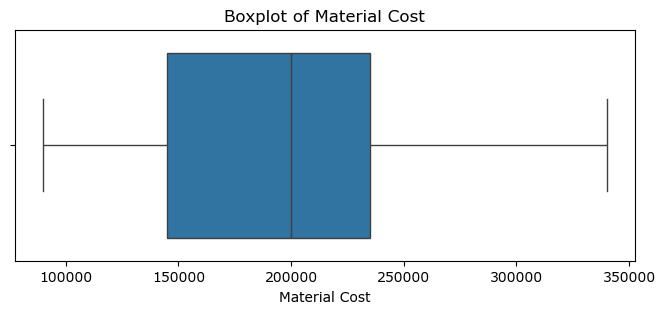

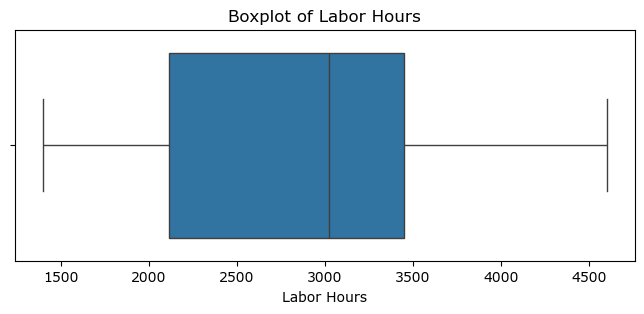

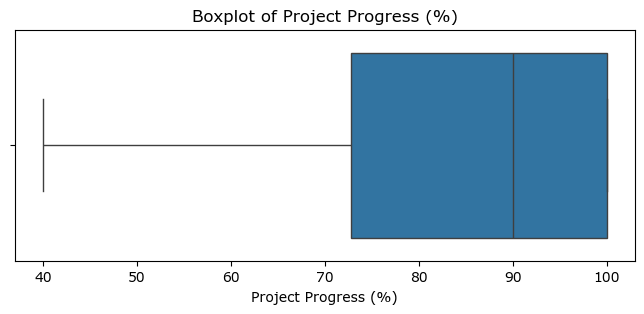

In [11]:
print('There are no outliers')
# Boxplot for Material Cost
plt.figure(figsize=(8, 3))
sns.boxplot(x=dfs['Material_Cost'])
plt.title('Boxplot of Material Cost')
plt.xlabel('Material Cost')
plt.show()

# Boxplot for Labor Hours
plt.figure(figsize=(8, 3))
sns.boxplot(x=dfs['Labor_Hours'])
plt.title('Boxplot of Labor Hours')
plt.xlabel('Labor Hours')
plt.show()

# Boxplot for Project Progress
plt.figure(figsize=(8, 3))
sns.boxplot(x=dfs['Project_Progress_New'])
plt.title('Boxplot of Project Progress (%)')
plt.xlabel('Project Progress (%)')
plt.show()

In [12]:
#Cost Efficiency: Which 'Site Location' has the highest average 'Material Cost' per project, and which has the lowest?
average_mat_cost = dfs.groupby('Site_Location')[['Material_Cost']].mean()
max_average_site = average_mat_cost.idxmax()
max_cost = average_mat_cost.max()
min_average_site = average_mat_cost.idxmin()
min_cost = average_mat_cost.min()
average_mat_cost.sort_values('Material_Cost')

,Material_Cost
Site_Location,
Site G,117500.000000
Site D,132083.333333
Site B,153350.515464
Site A,187307.692308
Site F,212083.333333
Site C,226250.000000
Site E,244615.384615
Site H,285000.000000


In [13]:
#Labor Utilization: Is there a correlation between 'Labor Hours' and 'Project Progress'
labour_project_corr = dfs['Labor_Hours'].corr(dfs['Project_Progress_New'])
print(labour_project_corr)
print('There is a negative correlation. as Labor Hours increase, Project Progress tends to decrease slightly')

-0.36354885655141445
There is a negative correlation. as Labor Hours increase, Project Progress tends to decrease slightly


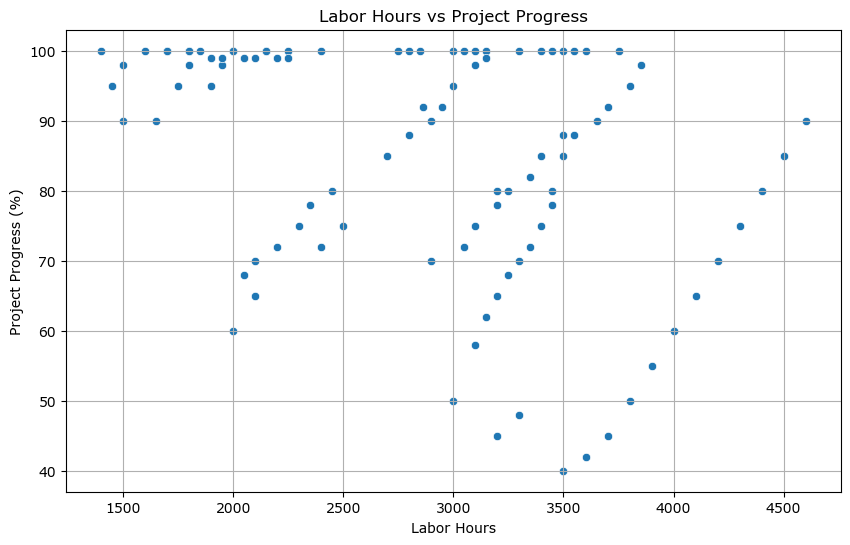

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Labor_Hours', y='Project_Progress_New', data=dfs)
plt.title('Labor Hours vs Project Progress')
plt.xlabel('Labor Hours')
plt.ylabel('Project Progress (%)')
plt.grid(True)
plt.show()

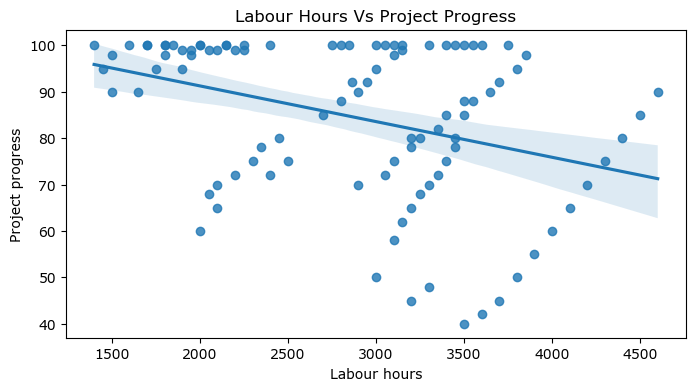

In [15]:
plt.figure(figsize=(8,4))
sns.regplot(x='Labor_Hours', y='Project_Progress_New', data=dfs)
plt.title('Labour Hours Vs Project Progress')
plt.xlabel('Labour hours')
plt.ylabel('Project progress')
plt.show()

In [16]:
dfs.head()

,Project_ID,Site_Location,Project_Status,Material_Cost,Labor_Hours,Project_Progress,Report_Date,Project_Progress_New
0,P001,Site A,In Progress,150000.0,2500.0,75%,2024-01-15,75.0
1,P002,Site B,Completed,120000.0,1800.0,100%,2023-12-01,100.0
2,P003,Site C,Delayed,200000.0,3000.0,50%,2024-01-20,50.0
4,P005,Site D,Completed,110000.0,1700.0,100%,2023-11-15,100.0
6,P006,Site B,In Progress,130000.0,2000.0,60%,2024-02-01,60.0


In [17]:
#Provide a count of projects in each 'Project Status' (e.g., "Completed", "In Progress", "Delayed").
status_group = dfs.groupby('Project_Status')['Project_Status'].count()
status_group

Project_Status
Completed      27
Delayed        11
In Progress    60
Name: Project_Status, dtype: int64

In [18]:
#Monthly Trends: What are the total 'Material Cost' and 'Labor Hours' incurred each month, based on the 'Report Date'?
dfs['Report_Month'] = dfs['Report_Date'].dt.to_period('M')
trend = dfs.groupby('Report_Month')[['Material_Cost', 'Labor_Hours']].sum().round(2)
trend

,Material_Cost,Labor_Hours
Report_Month,,
2023-11,110000.00,1700.00
2023-12,120000.00,1800.00
2024-01,630000.00,9700.00
2024-02,830000.00,12500.00
2024-03,1275206.19,20063.92
2024-04,1280000.00,19400.00
2024-05,1300000.00,19500.00
2024-06,1275000.00,18950.00
2024-07,1275000.00,18950.00


In [19]:
#Top 5 and Bottom 5 Projects: Based on a combined metric of 'Material Cost' and 'Labor Hours'
avg_labor_hour = dfs['Labor_Hours'].mean().round(2)
avg_material_cost = dfs['Material_Cost'].mean().round(2)
avg_labor_rate = (avg_material_cost/avg_labor_hour).round(2)
dfs['Total_Cost'] = (dfs['Material_Cost'] + dfs['Labor_Hours']) * avg_labor_rate
top_5 = dfs.nlargest(5, 'Total_Cost')
bottom_5 = dfs.nsmallest(5, 'Total_Cost')

In [20]:
insights = pd.DataFrame({
    'Metric': [
        'Site with Highest Avg Material Cost',
        'Highest Avg Material Cost',
        'Site with Lowest Avg Material Cost',
        'Lowest Avg Material Cost',
        'Labor Hours vs Project Progress (Correlation)'
    ],
    'Value': [
        max_average_site,
        max_cost,
        min_average_site,
        min_cost,
        labour_project_corr
    ]
})

In [21]:
# === Export to Excel ===
with pd.ExcelWriter('cleaned_construction_data.xlsx', engine='xlsxwriter') as writer:
    dfs.to_excel(writer, sheet_name='Cleaned_Data', index=False)
    insights.to_excel(writer, sheet_name='Analysis_Insights', index=False)
    
    # Export trend and project status on same sheet for clarity
    trend.to_excel(writer, sheet_name='Analysis_Insights', startrow=len(insights)+3)
    status_group.to_frame(name='Project_Count').to_excel(writer, sheet_name='Analysis_Insights', startrow=len(insights)+len(trend)+6)
    
    # Export top & bottom projects
    top_5.to_excel(writer, sheet_name='Top_Bottom_Projects', index=False, startrow=0)
    bottom_5.to_excel(writer, sheet_name='Top_Bottom_Projects', index=False, startrow=top_5.shape[0] + 3)